# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 20.09.2022

Мягкий дедлайн: 23:59MSK 04.10.2022

Жесткий дедлайн: 23:59MSK 10.10.2022

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни (**задача регрессии**) по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [2]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import random

In [ ]:
# %conda install wget

In [3]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2022-10-10 14:13:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: ‘data.txt.zip’

data.txt.zip        100%[===================>] 201.24M  40.3MB/s    in 5.4s    

2022-10-10 14:13:20 (37.0 MB/s) - ‘data.txt.zip’ saved [211011981/211011981]



In [4]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [5]:
corr_matrix = df.corr()
print(corr_matrix)

          0         1         2         3         4         5         6   \
0   1.000000  0.225374  0.021402 -0.139541 -0.003286  0.019338 -0.187443   
1   0.225374  1.000000  0.561747  0.245415  0.022270 -0.283635 -0.267820   
2   0.021402  0.561747  1.000000  0.018479  0.126845 -0.184864 -0.112388   
3  -0.139541  0.245415  0.018479  1.000000  0.152488 -0.131741  0.040808   
4  -0.003286  0.022270  0.126845  0.152488  1.000000  0.034988  0.321159   
..       ...       ...       ...       ...       ...       ...       ...   
86 -0.053548 -0.025499  0.048165 -0.093817  0.041973  0.004524  0.211509   
87  0.024589  0.048367 -0.004499  0.078392  0.031072 -0.006359 -0.038859   
88 -0.037432 -0.145238 -0.015567 -0.060559  0.248128 -0.016779  0.146493   
89  0.008380 -0.105449 -0.121116 -0.099712  0.034055  0.006124 -0.018272   
90 -0.056485 -0.183504 -0.159893  0.094694  0.011724  0.031739  0.021728   

          7         8         9   ...        81        82        83        84  \
0   0.

In [6]:
pd.set_option('display.max_rows', None)
corr_matrix[0]

0     1.000000
1     0.225374
2     0.021402
3    -0.139541
4    -0.003286
5     0.019338
6    -0.187443
7     0.110460
8    -0.034977
9    -0.024796
10    0.033180
11    0.030514
12   -0.097164
13    0.023284
14    0.078700
15   -0.007229
16    0.032829
17    0.030661
18    0.021965
19   -0.004512
20    0.087057
21   -0.056664
22    0.049736
23    0.046367
24   -0.058200
25    0.064713
26   -0.018139
27   -0.023177
28    0.008784
29    0.073327
30    0.017851
31   -0.073928
32    0.027000
33   -0.091186
34    0.043047
35   -0.043967
36   -0.101007
37   -0.041284
38    0.074424
39    0.070340
40   -0.123974
41   -0.060818
42    0.014305
43   -0.000375
44    0.013015
45    0.012700
46   -0.101324
47    0.096088
48   -0.046842
49   -0.032362
50   -0.062925
51    0.026813
52   -0.053082
53    0.074052
54   -0.047616
55    0.011095
56    0.007192
57   -0.096973
58   -0.004997
59   -0.092747
60   -0.067164
61   -0.024851
62   -0.043649
63   -0.126348
64    0.000396
65   -0.039029
66   -0.05

In [ ]:
#df = df.drop(df.columns[[4, 15, 19, 28, 43, 56, 58, 64, 71, 80, 82, 89]], axis=1) #Ne srabotalo(


In [9]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [10]:
from sklearn.preprocessing import StandardScaler
set_random_seed(123)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values



train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

train_scaler = StandardScaler()
X_train_std = train_scaler.fit_transform(X_train)
X_test_std = train_scaler.transform(X_test)

test_scaler = StandardScaler()
y_train_std = test_scaler.fit_transform(y_train.reshape(-1, 1))
y_test = y_test.reshape(-1, 1)

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [11]:
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge = Ridge(10).fit(X_train_std,y_train_std)
y_predict = ridge.predict(X_test_std)
y_predict = test_scaler.inverse_transform(y_predict.reshape(-1,1))
print(mean_squared_error(y_test, y_predict, squared=False))
con = y_test.mean()
con_a = [con]*len(y_test)
print(mean_squared_error(y_test, con_a, squared=False))

9.510161842816515
10.851909820717683


## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Не забудьте, что для улучшения качества модели вам поможет **нормировка таргета**.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [12]:
from torch.utils import data
class Dataset(data.Dataset):
    def __init__ (self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        X = self.x[idx, :]
        y = self.y[idx]
        
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32)
        
        return {'X':X, 'y':y}

In [13]:
set_random_seed(123)
train_set = Dataset(X_train_std, y_train_std)
test_set = Dataset(X_test_std, y_test)
train_loader = data.DataLoader(dataset=train_set, batch_size = 16, shuffle=True)
test_loader = data.DataLoader(dataset=test_set, batch_size = len(y_test), shuffle=False)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

In [14]:
import torch.utils.data as data_utils

model = nn.Sequential(      
    nn.Linear(90, 512, bias=True), 
    nn.GELU(),                 
    nn.Linear(512, 256, bias=True),
    nn.LeakyReLU(),    
    nn.Linear(256, 128, bias=True),
    nn.LeakyReLU(),  
    nn.Linear(128, 1, bias=True),
)

optimizer = torch.optim.Adagrad(model.parameters(), lr=0.0001, weight_decay = 0.1)
sсheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.55)
criterion = nn.MSELoss()

In [15]:
model

Sequential(
  (0): Linear(in_features=90, out_features=512, bias=True)
  (1): GELU(approximate=none)
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=128, out_features=1, bias=True)
)

In [16]:
from tqdm.notebook import tqdm

In [17]:
import matplotlib.pyplot as plt
set_random_seed(123)
def train(model, optimizer, sсheduler, criterion, train_loader, test_loader):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    '''
    loss_test = []
    loss_train = []
    for epoch in range(13):
      y_t = []
      y_p = []
      for i, smpl in enumerate(tqdm(train_loader)): 
        X_train = smpl['X']         
        y_train = smpl['y']         
        prediction = model(X_train)       
        loss = torch.sqrt(criterion(prediction, y_train))
        loss.backward()                                  
        optimizer.step()                                   
        optimizer.zero_grad
        y_p.extend(prediction.detach().numpy())    
        y_t.extend(y_train.detach().numpy())  
      lr = sсheduler.get_last_lr() 
      sсheduler.step()             
      y_p = test_scaler.inverse_transform(y_p) 
      y_t = test_scaler.inverse_transform(y_t)    
      loss_tn = (torch.sqrt(criterion(torch.tensor(y_p), torch.tensor(y_t)))) 
      pred = test(model, criterion, test_loader) 
      loss_tt = torch.sqrt(criterion(torch.tensor(pred), torch.tensor(y_test)))                                                     
      loss_test.append(loss_tt)  
      loss_train.append(loss_tn)
      print("Epoch:", epoch, "  Test:", loss_test[-1].item(), "  Train:", loss_tn.item()) 
      if epoch % 2 == 0:
        fig = plt.figure(figsize = (16, 8))
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        test_ln = plt.plot(np.arange(0, epoch+1), loss_test)
        train_ln = plt.plot(np.arange(0, epoch+1), loss_train)
        plt.show()

def test(model, criterion, test_loader):
    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''
    y_pr = []
    with torch.no_grad():
        for i, smpl in enumerate((test_loader)):
            X_test = smpl['X']         
            prediction = model(X_test)
            y_pr.extend(prediction.detach().numpy())
        y_pr = test_scaler.inverse_transform(y_pr)
    return y_pr

  0%|          | 0/28983 [00:00<?, ?it/s]

Epoch: 0   Test: 8.87561389691927   Train: 8.956917678242773


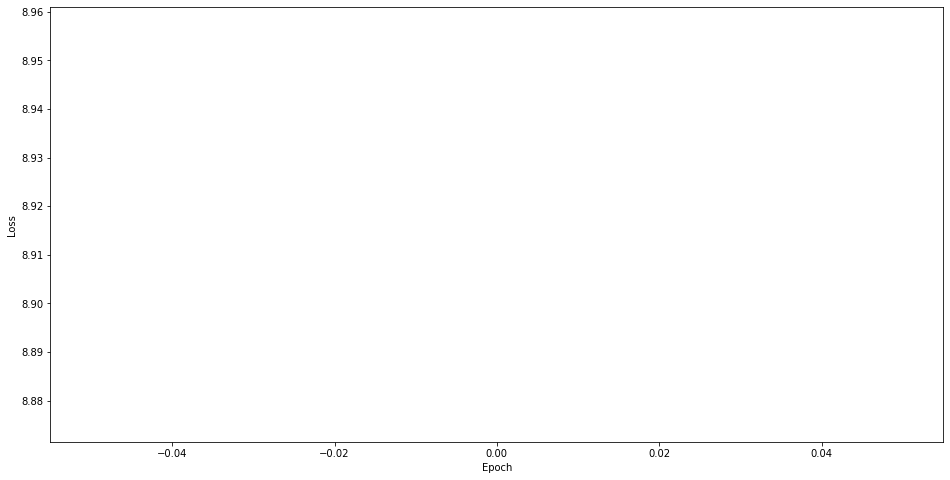

  0%|          | 0/28983 [00:00<?, ?it/s]

Epoch: 1   Test: 8.829360932859327   Train: 8.639366907135367


  0%|          | 0/28983 [00:00<?, ?it/s]

Epoch: 2   Test: 8.781870630234794   Train: 8.538070077003349


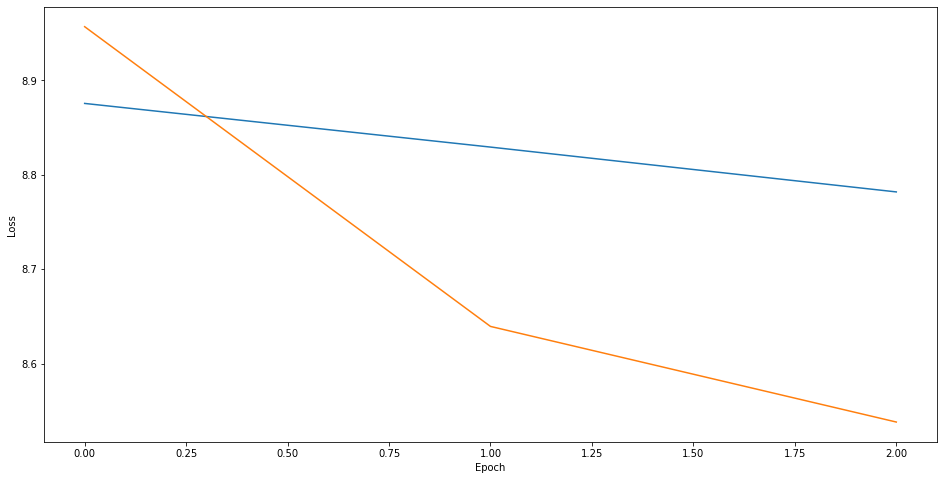

  0%|          | 0/28983 [00:00<?, ?it/s]

Epoch: 3   Test: 8.750012491874715   Train: 8.47120557935791


  0%|          | 0/28983 [00:00<?, ?it/s]

Epoch: 4   Test: 8.760940778102265   Train: 8.434202852781773


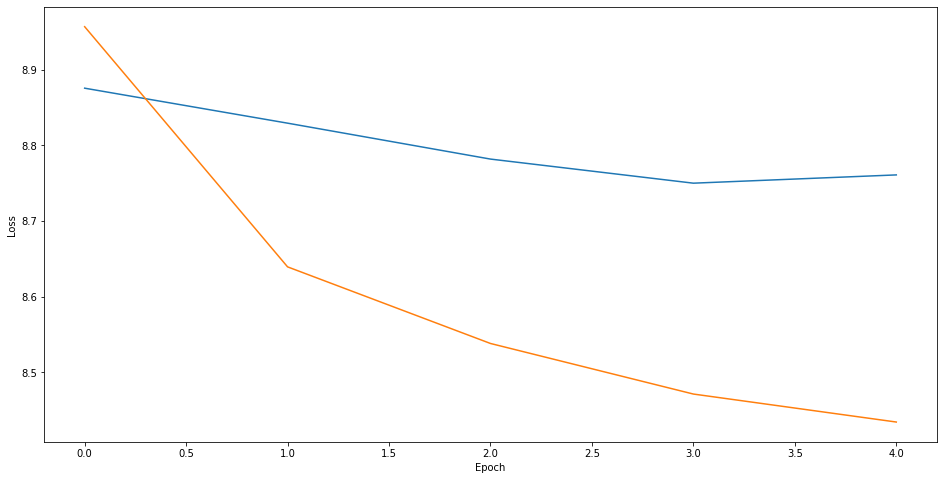

  0%|          | 0/28983 [00:00<?, ?it/s]

Epoch: 5   Test: 8.751946338143638   Train: 8.418633340659348


  0%|          | 0/28983 [00:00<?, ?it/s]

Epoch: 6   Test: 8.75173939308546   Train: 8.404181243465459


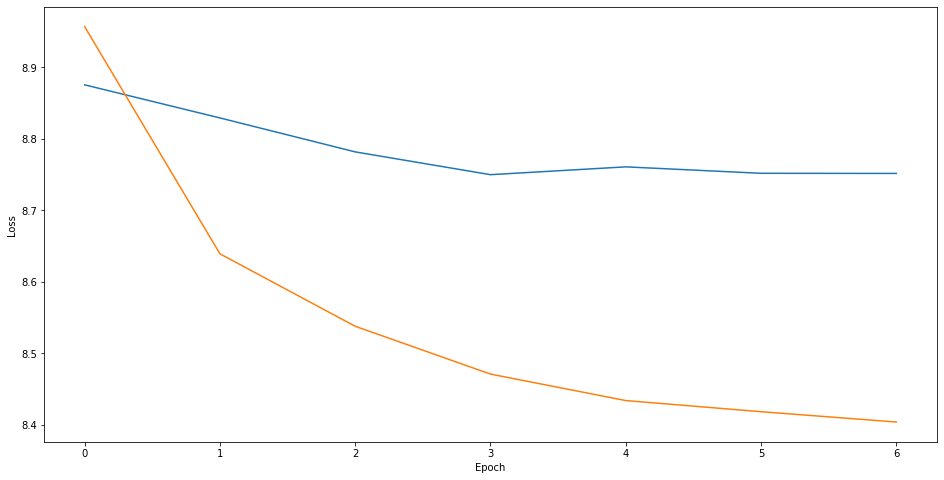

  0%|          | 0/28983 [00:00<?, ?it/s]

Epoch: 7   Test: 8.747101088440475   Train: 8.401845242643864


  0%|          | 0/28983 [00:00<?, ?it/s]

Epoch: 8   Test: 8.746732984864543   Train: 8.395369643591899


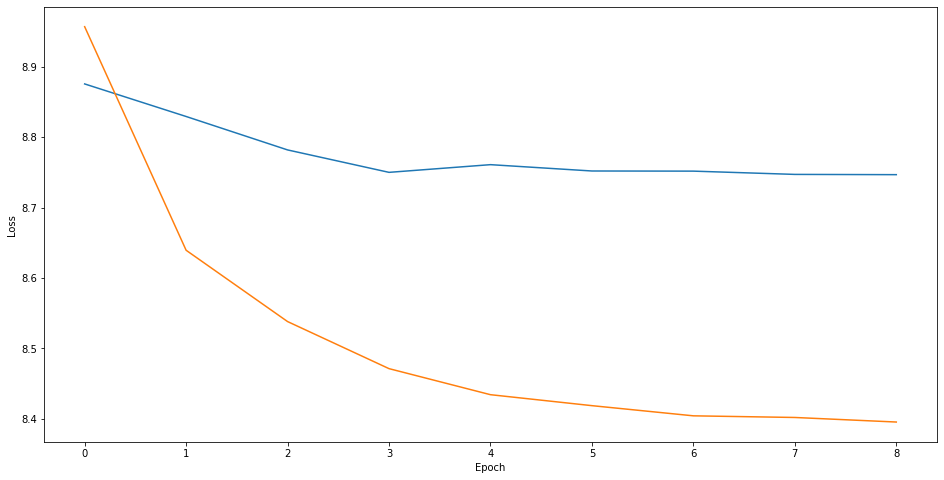

  0%|          | 0/28983 [00:00<?, ?it/s]

Epoch: 9   Test: 8.746986621327762   Train: 8.394404979597176


  0%|          | 0/28983 [00:00<?, ?it/s]

Epoch: 10   Test: 8.747052413707557   Train: 8.394364172741552


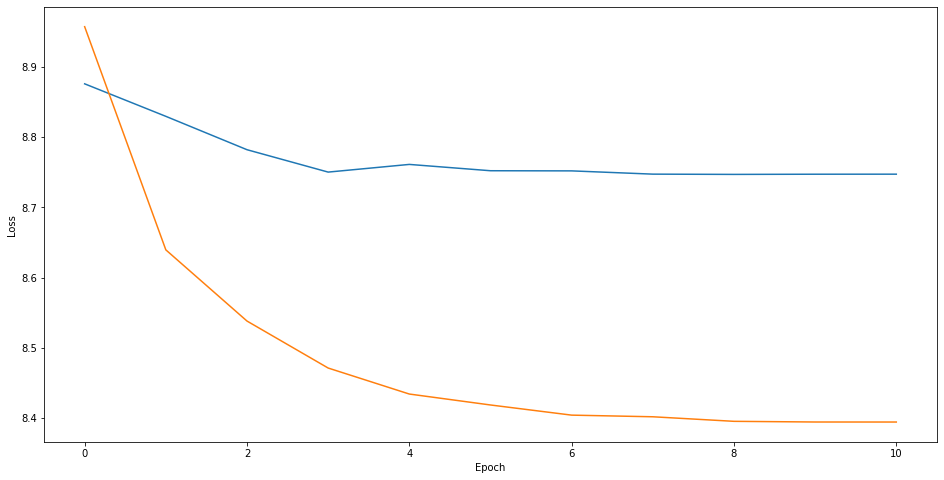

  0%|          | 0/28983 [00:00<?, ?it/s]

Epoch: 11   Test: 8.747075757415967   Train: 8.394420606041392


  0%|          | 0/28983 [00:00<?, ?it/s]

Epoch: 12   Test: 8.747076953577473   Train: 8.394435119102502


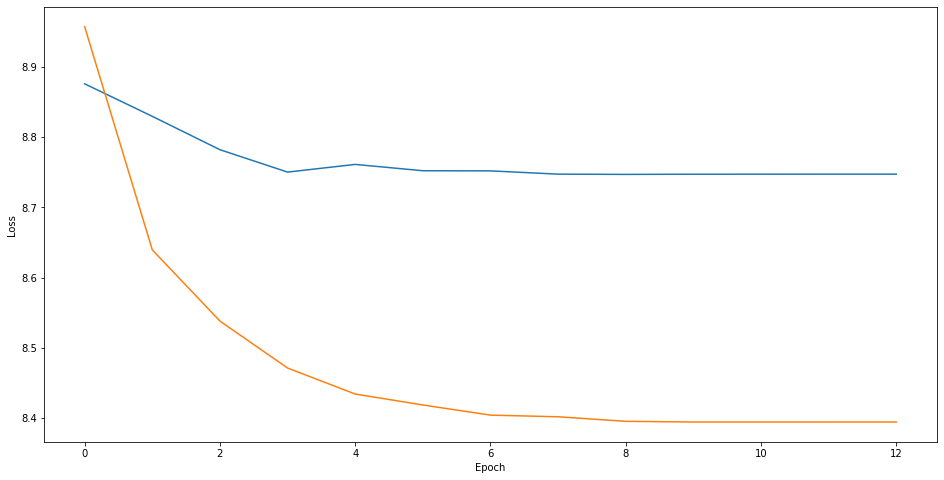

In [18]:
train(model, optimizer, sсheduler, criterion, train_loader, test_loader)

In [19]:
pred = test(model, criterion, test_loader)
print(mean_squared_error(y_test, pred, squared=False))

8.747076953577473


In [20]:
assert test(model, criterion, test_loader).shape[0] == y_test.shape[0]

## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

В первую очередь, был проведен ряд экспериментов с необработанными данными. 
Однако, обучение сетей с разными архитектурами и гиперпараметрами не приводило к необходимым результатам. Наилучший RMSE был равен +- 15 годам


После этого, сети обучались на обработанных данных, но без нормировки таргета. Например, при данных параметрах ( lr = 0,0001, batch_size = 128, 10 эпохах и модели вида (Linear(90, 64), Relu, Linear(64, 1)) RMSE упал до значения 11.51. Далее были попытки уменьшить ошибку путем изменения гиперпараметров. Например, та же модель, но на 16 эпохах дала RMSE на тесте, равную 10.7. Увеличение lr до значения 0.0003 чуть ухудшило предикт модели до 10.88. Увеличение размера батча до 256 привело к серьезному увеличению ошибки на тесте, она стала равна 20.42 годам. В то же время, уменьшение данного гиперпараметра привело к улучшению модели, RMSE на тесте стал равен 10.53. Также были попытки видоизменить модель(добавлялись новые скрытые слои). Именно на этом этапе модель приобрела окончательный вид, с такой моделью значение ошибки еще чуть чуть уменьшилось, до показателя 10.43. Эксперименты с разными оптимизаторами не давали серьезных улучшений


Наконец, дело дошло до подсказки, касающейся нормировки таргета. Данный шаг резко привел к увеличению качетсва модели, RMSE почти с первой попытки приблизился к 9. После этого стала заметна разница в оптимизаторах, Adagrad давал чуть более высокое качетсво, чем, например, SGD или Adam. При значениях lr = 0.0001 и weight_decay = 0.1 значение RMSE упало примерно до 8.84. Однако было ощущение, что при заданном lr ошибка не доходит до минимума. Попытка уменьшать lr на каждом шаге (трюк из прошлогоднего курса), по итогу, и принесла желаемый результат в виде RMSE < 8.75


P.S. Само собой, при изменяющемся lr гиперпараметры были подобраны не с первой попытки, поэтому в процессе подбора была предпринята попытка по небольшой обработке датасета. Из него были исключены около 15 стобцов, с которыми столбец таргета коррелировал в наименьшей степени. Результат работы модели приведен снизу, на графике, после 3-й эпохи модель начала немного переобучаться и ошибка на тесте на следующих эпохах, хоть и не сильно, но увеличивалась.

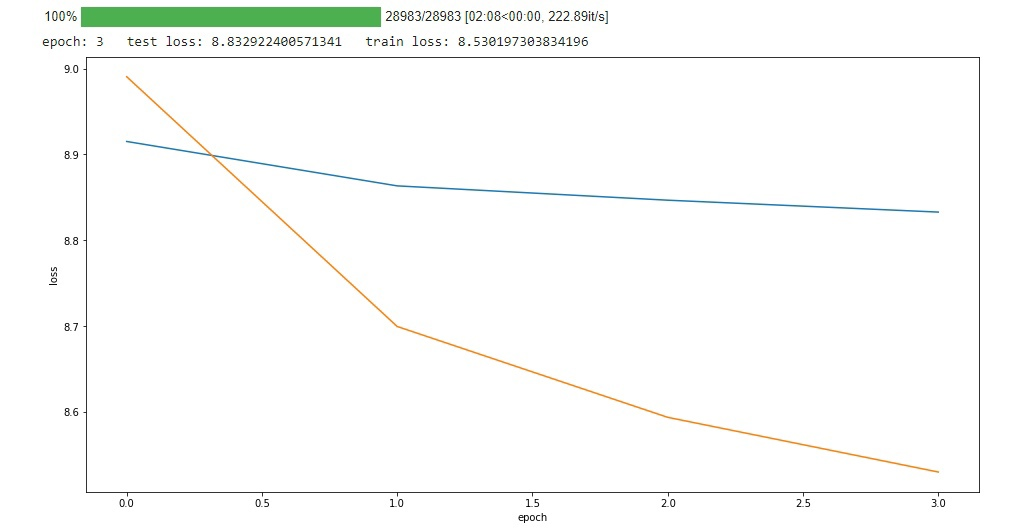

PS.PS. К предыдущим экспериментам не были представлены графики, так как полетела система и скриншоты с ними бесследно исчезли